### Microscopic Model

### Field

Field Space Specifications
----------------------------------------------
NA				: 0.8
Space Dimension 		: 5.12um × 5.12um × 5.12um
voxel Size 			: 0.04um × 0.04um × 0.04um
Pattern Dimension 		: 0.16um × 0.16um 
Computational Device 		: cuda


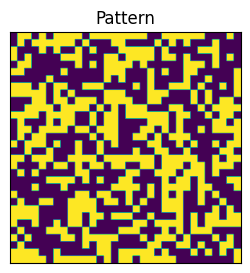

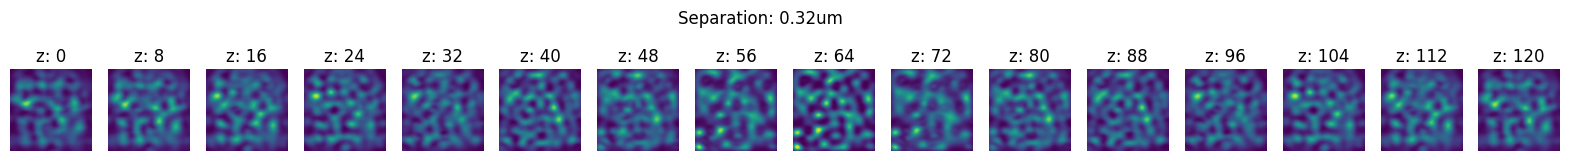

In [2]:
from libs.forward_lib.field_model import FieldModel
from libs.forward_lib.physical_model import PhysicalModel

# Parameter Initialization
nx, ny, nz = 128, 128, 128
PhysicalModel.dx, PhysicalModel.dy, PhysicalModel.dz = .04, .04, .04
PhysicalModel.ep_dx, PhysicalModel.ep_dy = .16, .16
FM = FieldModel(nx, ny, nz)

# Model Parameters
print(FM)

# PSF Calculation & Field Propagation
FM.propagate_field()

# Visualizing DMD pattern
FM.PM.dmd.visualize_patterns()


# Visualize at Field at Certain Seperation
FM.visualize_at_separation(separation=.32)

# Saving the Field Space Matrix
FM.save_object_space(it = 102)


***Loading Workflow***

Field Space Specifications
----------------------------------------------
NA				: 0.8
Space Dimension 		: 5.12um × 5.12um × 5.12um
voxel Size 			: 0.04um × 0.04um × 0.04um
Pattern Dimension 		: 0.16um × 0.16um 
Computational Device 		: cuda


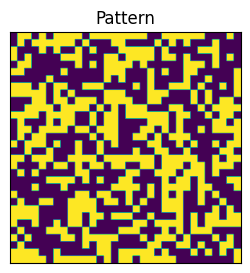

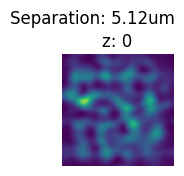

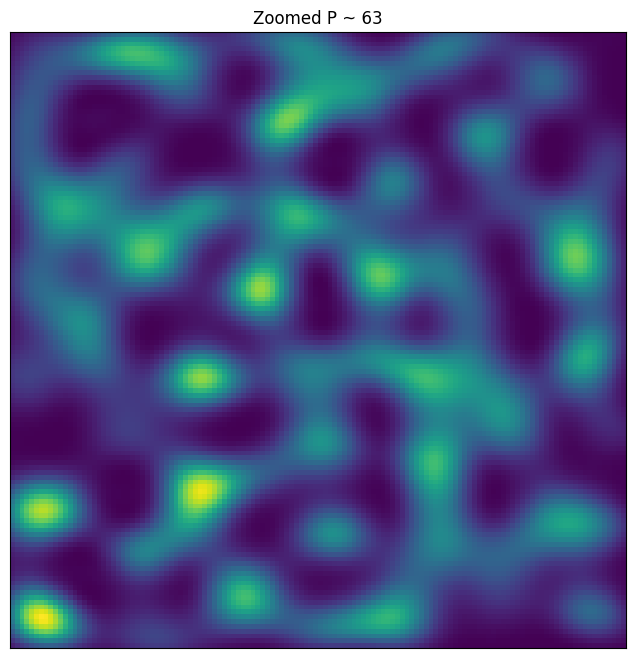

In [3]:
from libs.forward_lib.field_model import FieldModel

IT = 102
# Model Initialization
FM = FieldModel()
FM.load_object_space(IT)

# Model Parameters
print(FM)

# Visualizing DMD pattern
FM.PM.dmd.visualize_patterns()

# Visualize at Feild at Certain Seperation
FM.visualize_at_separation(separation=5.12)

FM.zoom_plane(63,fig_size=(8,8))

***Clear Analysis***

Field Space Specifications
----------------------------------------------
NA				: 0.8
Space Dimension 		: 10.24um × 10.24um × 10.24um
voxel Size 			: 0.08um × 0.08um × 0.08um
Pattern Dimension 		: 0.64um × 0.64um 
Computational Device 		: cuda


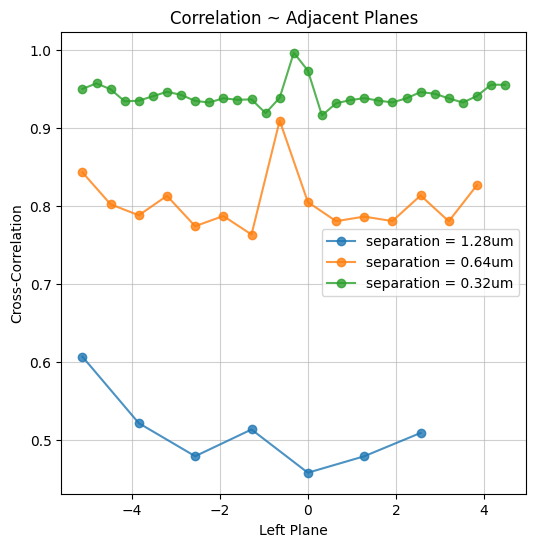

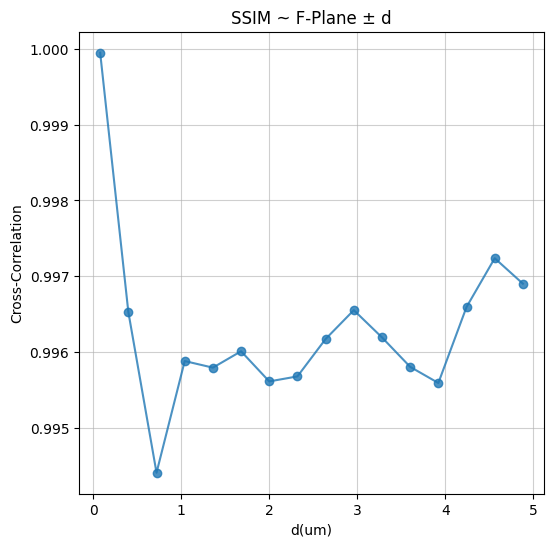

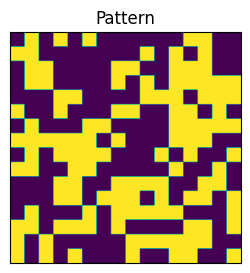

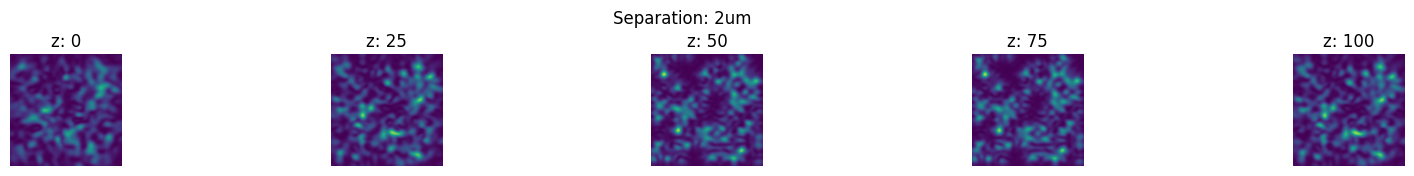

In [2]:
from libs.forward_lib.field_model import FieldModel

it = 102
FM = FieldModel()
FM.load_object_space(it = it)
print(FM)
FM.correlation_measure([1.28,.64,.32])
FM.symmetric_check(4)
FM.PM.dmd.visualize_patterns()
FM.visualize_at_separation(2)